In [1]:

import geopandas as gpd
import os
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np

import pathlib 
parent_path = pathlib.Path(os.getcwd()).parent

site=24

# Load the data
clean_amazonBiome = gpd.read_file(parent_path/"data"/"det"/'map.geojson')
id=gpd.read_file(parent_path/"data"/"hmc"/"id_24.geojson").to_crs(epsg=4326)
id_hmc = id.copy()
id_det = id.copy()



In [2]:
import pickle
import pandas as pd

file_path = parent_path / "output" / "xi_0.5" /  f"sitenum_{site}" / "model_full_model_v3" / "pf_25.0" / "pa_41.945" / "weight_0.25" / "timehzn_200" / "results.pcl"

with open(file_path, 'rb') as f:
    # Load the data from the file
    results = pickle.load(f)

    


z_hmc=results['sol_val_Z_tracker'][-1][:,:50]
df_ori = pd.read_csv(parent_path/"data"/"hmc"/"hmc_24SitesModel.csv")

## Sum the z dot and add it to the z_2017
site_z_0 = df_ori.iloc[:, 1].to_numpy()
site_z_0_reshaped = site_z_0.reshape(site, 1)
site_z_bar=df_ori.iloc[:,2].to_numpy()
cumulative_hmc_z = (np.cumsum(z_hmc, axis=1)+site_z_0_reshaped/1e9)

## load deterministic z solved

z_det=results['sol_val_Z_tracker'][0][:,:50]
cumulative_det_z = (np.cumsum(z_det, axis=1)+site_z_0_reshaped/1e9)

## add t=0 for hmc solution
cumulative_hmc_z = np.hstack((site_z_0_reshaped/1e9, cumulative_hmc_z))
cumulative_det_z = np.hstack((site_z_0_reshaped/1e9, cumulative_det_z))


positions_hmc = []

for i in range(cumulative_hmc_z.shape[0]):
    series = cumulative_hmc_z[i, :50]
    for j in range(1, len(series)):
        if series[j] < series[j-1] - (0.05 * series[j-1]):

            positions_hmc.append((j))
            break  # exit the inner loop once the first position is found for this `i`

positions_det = []

for i in range(cumulative_det_z.shape[0]):
    series = cumulative_det_z[i, :50]
    for j in range(1, len(series)):
        if series[j] < series[j-1] - (0.05 * series[j-1]):

            positions_det.append((j))
            break  # exit the inner loop once the first position is found for this `i`






/home/pengyu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # Remove the CWD from sys.path while we load stuff.
/home/pengyu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # Remove the CWD from sys.path while we load stuff.


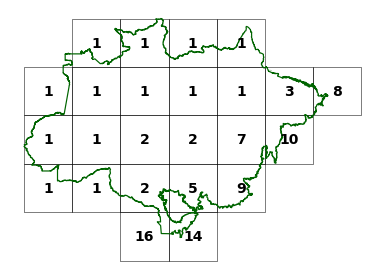

In [3]:
id_hmc['id']=positions_hmc
fig, ax = plt.subplots()

# Base layer
id_hmc.boundary.plot(edgecolor='black', facecolor='none', linewidth=0.5, ax=ax)

# Amazon Biome overlay
clean_amazonBiome.boundary.plot(color="darkgreen", linewidth=1.2, ax=ax)

for x, y, label in zip(id_hmc.geometry.centroid.x, id_hmc.geometry.centroid.y, id_hmc['id']):
    ax.text(x, y, str(label), fontsize=14, ha='center', va='center',fontweight='bold')

# Setting title, labels, etc.
# ax.set_title("Density of Z(2017)^i (million hectares)")
# ax.set_xlabel('')
# ax.set_ylabel('')
ax.axis('off')  # turn off the axis

plt.tight_layout()
fig.savefig('map_uncertain.png', dpi=300)
plt.show()

/home/pengyu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # Remove the CWD from sys.path while we load stuff.
/home/pengyu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # Remove the CWD from sys.path while we load stuff.


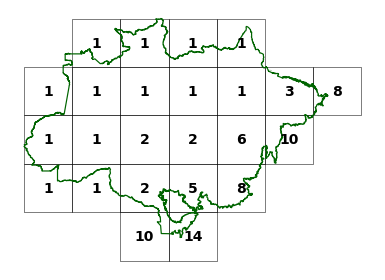

In [4]:
id_det['id']=positions_det
fig, ax = plt.subplots()

# Base layer
id_det.boundary.plot(edgecolor='black', facecolor='none', linewidth=0.5, ax=ax)

# Amazon Biome overlay
clean_amazonBiome.boundary.plot(color="darkgreen", linewidth=1.2, ax=ax)

for x, y, label in zip(id_det.geometry.centroid.x, id_det.geometry.centroid.y, id_det['id']):
    ax.text(x, y, str(label), fontsize=14, ha='center', va='center',fontweight='bold')

# Setting title, labels, etc.
# ax.set_title("Density of Z(2017)^i (million hectares)")
# ax.set_xlabel('')
# ax.set_ylabel('')
ax.axis('off')  # turn off the axis

plt.tight_layout()
fig.savefig('map_deterministic.png', dpi=300)
plt.show()

/home/pengyu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

/home/pengyu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

/home/pengyu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

/home/pengyu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a pr

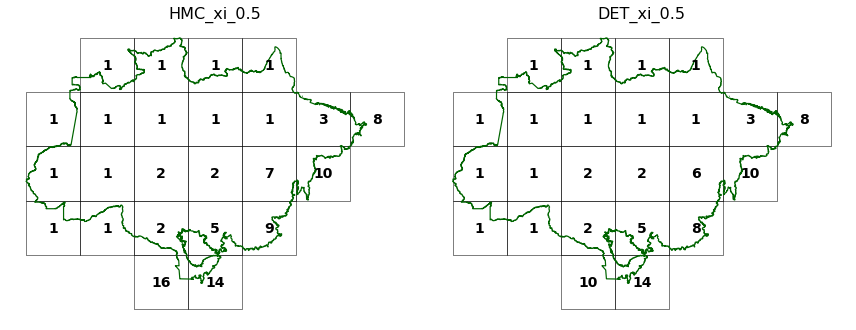

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Set up the figure and the gridspec
fig = plt.figure(figsize=(12, 6))  # you can adjust the figsize to your needs
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  # assuming both plots are of the same width

# First plot (HMC)
ax0 = fig.add_subplot(gs[0])

# Base layer
id_hmc.boundary.plot(edgecolor='black', facecolor='none', linewidth=0.5, ax=ax0)

# Amazon Biome overlay
clean_amazonBiome.boundary.plot(color="darkgreen", linewidth=1.2, ax=ax0)

for x, y, label in zip(id_hmc.geometry.centroid.x, id_hmc.geometry.centroid.y, id_hmc['id']):
    ax0.text(x, y, str(label), fontsize=14, ha='center', va='center', fontweight='bold')

ax0.axis('off')  # turn off the axis
ax0.set_title('HMC_xi_0.5', fontsize=16)  # Title for the first plot

# Second plot (DET)
ax1 = fig.add_subplot(gs[1])
id_det['id'] = positions_det

# Base layer
id_det.boundary.plot(edgecolor='black', facecolor='none', linewidth=0.5, ax=ax1)

# Amazon Biome overlay
clean_amazonBiome.boundary.plot(color="darkgreen", linewidth=1.2, ax=ax1)

for x, y, label in zip(id_det.geometry.centroid.x, id_det.geometry.centroid.y, id_det['id']):
    ax1.text(x, y, str(label), fontsize=14, ha='center', va='center', fontweight='bold')

ax1.axis('off')  # turn off the axis
ax1.set_title('DET_xi_0.5', fontsize=16)  # Title for the second plot

plt.tight_layout()
fig.savefig('maps_xi_0.5.png', dpi=300)
plt.show()
